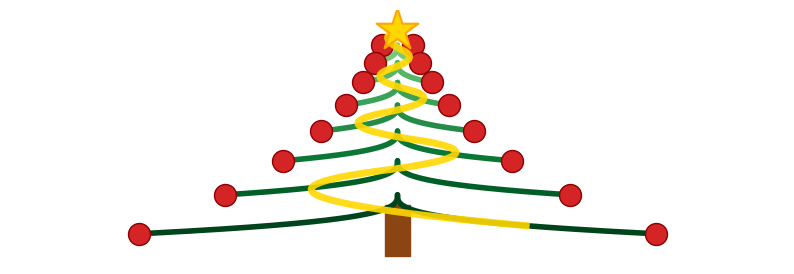

In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def rysuj_choinke():
    # KONFIGURACJA 
    potega = 3           # Krzywizna gałęzi (y = x^3)
    przyrost_proc = 50   # O ile % każda kolejna gałąź jest większa
    liczba_pieter = 8    
    start_dlugosc = 1.0  
    
    # KONFIGURACJA PIEŃKA 
    PIEN_GORA_Y = 1.88       # Górna krawędź (lekko na plusie, by schować łączenie)
    PIEN_DOL_Y = -1.5        # Dolna krawędź
    PIEN_POLOWA_SZER = 0.8   # Połowa szerokości pnia
    
    # Kolory
    kolor_pnia = '#8B4513'
    kolor_gwiazdy = '#FFD700'
    kolor_girlandy = 'gold'
    kolor_bombelek = '#D42426'

    # 1. OBLICZENIA MATEMATYCZNE GAŁĘZI
    obecny_x = 0
    obecna_dlugosc = start_dlugosc
    dane_galezi = [] 
    
    # Generowanie krzywych (współrzędne przed obrotem)
    for k in range(liczba_pieter):
        dlugosc_segmentu = obecna_dlugosc ** (1 / potega)
        t = np.linspace(0, dlugosc_segmentu, 300)
        
        y_val = t ** potega         # Szerokość (odchył)
        x_val = t + obecny_x        # Wysokość (wzdłuż pnia)
        
        dane_galezi.append((x_val, y_val))
        
        obecny_x += dlugosc_segmentu
        obecna_dlugosc *= (1 + przyrost_proc / 100)

    calkowita_wysokosc = obecny_x

    # 2. OBLICZANIE GIRLANDY (Zygzak 1/2 szerokości)
    pkty_girlandy_x = [0]
    pkty_girlandy_y = [calkowita_wysokosc]

    for k in range(liczba_pieter):
        x_arr = dane_galezi[k][0] # Wysokość
        y_arr = dane_galezi[k][1] # Szerokość
        
        # Znajdź punkt, gdzie szerokość to 50% max szerokości tej gałęzi
        target_width = y_arr[-1] * 0.5
        idx = (np.abs(y_arr - target_width)).argmin()
        
        # Konwersja na układ współrzędnych wykresu
        g_y = calkowita_wysokosc - x_arr[idx]
        g_x_abs = y_arr[idx]
        
        # Zmieniaj strony (lewo/prawo)
        if k % 2 == 0:
            g_x = -g_x_abs 
        else:
            g_x = g_x_abs  
            
        pkty_girlandy_x.append(g_x)
        pkty_girlandy_y.append(g_y)

    # Wygładzanie girlandy (Splajn)
    if len(pkty_girlandy_x) > 2:
        t_spline = np.linspace(0, 1, len(pkty_girlandy_x))
        t_new = np.linspace(0, 1, 500)
        spl_x = make_interp_spline(t_spline, pkty_girlandy_x, k=2)
        spl_y = make_interp_spline(t_spline, pkty_girlandy_y, k=2)
        girlanda_smooth_x = spl_x(t_new)
        girlanda_smooth_y = spl_y(t_new)
    else:
        girlanda_smooth_x, girlanda_smooth_y = pkty_girlandy_x, pkty_girlandy_y

    # 3. RYSOWANIE WYKRESU 
    fig, ax = plt.subplots(figsize=(10, 14))
    kolory_galezi = plt.cm.Greens(np.linspace(0.4, 1.0, liczba_pieter))

    # Współrzędne pnia dla kontroli
    # print(f"Pieniek -> Góra: {PIEN_GORA_Y}, Dół: {PIEN_DOL_Y}, Szerokość: {PIEN_POLOWA_SZER*2}")

    # Rysowanie pnia
    ax.fill_between([-PIEN_POLOWA_SZER, PIEN_POLOWA_SZER], 
                    [PIEN_DOL_Y, PIEN_DOL_Y], 
                    [PIEN_GORA_Y, PIEN_GORA_Y], 
                    color=kolor_pnia, zorder=0)

    # Rysowanie gałęzi i bombek
    for k in range(liczba_pieter):
        x_arr, y_arr = dane_galezi[k]
        
        # Odwracanie osi Y (by choinka stała pionowo)
        Y_plot = calkowita_wysokosc - x_arr
        X_plot = y_arr
        kolor = kolory_galezi[k]
        
        # Prawa i lewa strona
        ax.plot(X_plot, Y_plot, color=kolor, lw=4, solid_capstyle='round', zorder=k+1)
        ax.plot(-X_plot, Y_plot, color=kolor, lw=4, solid_capstyle='round', zorder=k+1)

        # Bombki na końcach
        ax.scatter(X_plot[-1], Y_plot[-1], color=kolor_bombelek, s=250, zorder=20, edgecolors='darkred')
        ax.scatter(-X_plot[-1], Y_plot[-1], color=kolor_bombelek, s=250, zorder=20, edgecolors='darkred')

    # Rysowanie girlandy
    ax.plot(girlanda_smooth_x, girlanda_smooth_y, color=kolor_girlandy, lw=5, 
            linestyle='-', alpha=0.9, zorder=25)

    # Rysowanie gwiazdy
    ax.scatter(0, calkowita_wysokosc, color=kolor_gwiazdy, s=1000, marker='*', 
               zorder=30, edgecolors='orange', linewidth=1.5)

    # Ustawienia widoku
    ax.set_aspect('equal')
    ax.axis('off')
    max_szerokosc = dane_galezi[-1][1][-1] * 1.5
    ax.set_ylim(PIEN_DOL_Y - 0.5, calkowita_wysokosc * 1.1)
    ax.set_xlim(-max_szerokosc, max_szerokosc)

    plt.savefig('choinka.png', dpi=200, bbox_inches='tight', facecolor='white')
    plt.show()

rysuj_choinke()